___

#### Rick Fontenot
___


In [1]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import date
import sklearn
pd.set_option("display.max_columns", None, "display.max_rows", None)

import os
import sys
import tempfile
import mimetypes
import webbrowser

# Import the email modules we'll need
from email import policy
from email.parser import BytesParser

import re
import email

import missingno as msno



## Read in data files and merge them, maintaining a feature with the year number for each file:


In [3]:
from scipy.io import arff

import pandas as pd

file1 = arff.loadarff('/Users/rickfontenot/Dropbox/SMU/DS7333 Quantifying World/QTW_Github/QTW/Case Study 4/data/1year.arff')
year1 = pd.DataFrame(file1[0])
year1['year']=1

file2 = arff.loadarff('/Users/rickfontenot/Dropbox/SMU/DS7333 Quantifying World/QTW_Github/QTW/Case Study 4/data/2year.arff')
year2 = pd.DataFrame(file2[0])
year2['year']=2

file3 = arff.loadarff('/Users/rickfontenot/Dropbox/SMU/DS7333 Quantifying World/QTW_Github/QTW/Case Study 4/data/3year.arff')
year3 = pd.DataFrame(file3[0])
year3['year']=3

file4 = arff.loadarff('/Users/rickfontenot/Dropbox/SMU/DS7333 Quantifying World/QTW_Github/QTW/Case Study 4/data/4year.arff')
year4 = pd.DataFrame(file4[0])
year4['year']=4

file5 = arff.loadarff('/Users/rickfontenot/Dropbox/SMU/DS7333 Quantifying World/QTW_Github/QTW/Case Study 4/data/5year.arff')
year5 = pd.DataFrame(file5[0])
year5['year']=5

bankrupt_df = pd.concat([year1, year2, year3, year4, year5], axis=0)

print(bankrupt_df.shape)

bankrupt_df.head()

(43405, 66)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class,year
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,0.249760,0.65980,0.166600,0.249760,497.42,0.73378,2.6349,0.249760,0.149420,43.370,1.2479,0.21402,0.119980,0.47706,0.50494,0.60411,1.45820,1.7615,5.9443,0.11788,0.149420,94.14,3.8772,0.56393,0.21402,1.7410,593.2700,0.50591,0.128040,0.662950,0.051402,0.128040,114.42,71.050,1.00970,1.52250,49.394,0.185300,0.110850,2.0420,0.37854,0.25792,2.2437,2.2480,348690.0,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0',1
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,0.261140,0.51680,0.158350,0.258340,677.96,0.53838,2.0005,0.258340,0.152000,87.981,1.4293,0.24806,0.123040,NaN,0.39542,0.43992,88.44400,16.9460,3.6884,0.26969,0.152000,122.17,2.9876,2.98760,0.20616,1.6996,NaN,0.49788,0.121300,0.086422,0.064371,0.145950,199.49,111.510,0.51045,1.12520,100.130,0.237270,0.139610,1.9447,0.49988,0.33472,17.8660,17.8660,2304.6,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0',1
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,0.312580,0.64184,0.244350,0.309060,794.16,0.45961,1.4369,0.309060,0.236100,73.133,1.4283,0.30260,0.189960,NaN,0.28932,0.37282,86.01100,1.0627,4.3749,0.41929,0.238150,176.93,2.0630,1.42740,0.31565,1.3090,2.3019,0.51537,0.241140,0.322020,0.074020,0.231170,165.51,92.381,0.94807,1.01010,96.372,0.291810,0.222930,1.0758,0.48152,0.48474,1.2098,2.0504,6332.7,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0',1
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,0.092704,0.30163,0.094257,0.092704,917.01,0.39803,3.2537,0.092704,0.071428,79.788,1.5069,0.11550,0.062782,0.17193,0.57353,0.36152,0.94076,1.9618,4.6511,0.14343,0.071428,91.37,3.9948,0.37581,0.11550,1.3562,NaN,0.57353,0.088995,0.401390,0.069622,0.088995,180.77,100.980,0.28720,1.56960,84.344,0.085874,0.066165,2.4928,0.30734,0.25033,2.4524,2.4524,20545.0,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0',1
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,0.187320,0.33147,0.121820,0.187320,1133.20,0.32211,1.6307,0.187320,0.115530,57.045,NaN,0.19832,0.115530,0.18732,0.38677,0.32211,1.41380,1.1184,4.1424,0.27884,0.115530,147.04,2.4823,0.32340,0.19832,1.6278,11.2470,0.43489,0.122310,0.293040,0.096680,0.122310,141.62,84.574,0.73919,0.95787,65.936,0.188110,0.116010,1.2959,0.56511,0.40285,1.8839,2.1184,3186.6,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0',1


Data is originally from UCI:
https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data

- 1stYear â€“ the data contains financial rates from 1st year of the forecasting period and corresponding class label that indicates bankruptcy status after 5 years. The data contains 7027 instances (financial statements), 271 represents bankrupted companies, 6756 firms that did not bankrupt in the forecasting period.
- 2ndYear â€“ the data contains financial rates from 2nd year of the forecasting period and corresponding class label that indicates bankruptcy status after 4 years. The data contains 10173 instances (financial statements), 400 represents bankrupted companies, 9773 firms that did not bankrupt in the forecasting period.
- 3rdYear â€“ the data contains financial rates from 3rd year of the forecasting period and corresponding class label that indicates bankruptcy status after 3 years. The data contains 10503 instances (financial statements), 495 represents bankrupted companies, 10008 firms that did not bankrupt in the forecasting period.
- 4thYear â€“ the data contains financial rates from 4th year of the forecasting period and corresponding class label that indicates bankruptcy status after 2 years. The data contains 9792 instances (financial statements), 515 represents bankrupted companies, 9277 firms that did not bankrupt in the forecasting period.
- 5thYear â€“ the data contains financial rates from 5th year of the forecasting period and corresponding class label that indicates bankruptcy status after 1 year. The data contains 5910 instances (financial statements), 410 represents bankrupted companies, 5500 firms that did not bankrupt in the forecasting period.

All 5 years combined should have 43405 instances total

The concatenated dataframe includes a feature for the year number the instnaces come from as that may affect predictions

In [4]:
bankrupt_df['class'].unique()

array([b'0', b'1'], dtype=object)

In [5]:
def replace_all(text, dic):
    for i, j in dic.items():
        text = text.replace(i, j)
    return text

d = { b'0': 0, b'1': 1}

bankrupt_df['bankrupt'] = replace_all(bankrupt_df['class'], d)
bankrupt_df['bankrupt'].unique()



array([0, 1])

In [ ]:
bankrupt_df['bankrupt'].mean()


In [83]:
bankrupt_by_year = bankrupt_df.groupby('year', as_index=False)['bankrupt'].mean()
bankrupt_by_year = bankrupt_by_year.rename(columns={bankrupt_by_year.columns[1]: '%Bankrupt'})
bankrupt_by_year.year = bankrupt_by_year.year.astype(int)
bankrupt_by_year['%Bankrupt'] = bankrupt_by_year['%Bankrupt']*100
bankrupt_by_year['%Bankrupt'] = bankrupt_by_year['%Bankrupt'].round(2)


bankrupt_by_year


,year,%Bankrupt
0,1,3.86
1,2,3.93
2,3,4.71
3,4,5.26
4,5,6.94


In [7]:
bankrupt_df = bankrupt_df.drop(['class'], axis=1)
bankrupt_df.head(10)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,year,bankrupt
0,0.200550,0.379510,0.396410,2.0472,32.3510,0.38825,0.249760,1.33050,1.13890,0.50494,0.249760,0.659800,0.166600,0.249760,497.420,0.733780,2.6349,0.249760,0.149420,43.370,1.24790,0.214020,0.119980,0.477060,0.50494,0.604110,1.45820,1.76150,5.9443,0.11788,0.149420,94.1400,3.8772,0.56393,0.214020,1.74100,593.2700,0.50591,0.128040,0.662950,0.051402,0.128040,114.420,71.0500,1.00970,1.52250,49.394,0.185300,0.110850,2.04200,0.378540,0.25792,2.24370,2.2480,348690.0000,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.6580,4.4158,7.4277,1,0
1,0.209120,0.499880,0.472250,1.9447,14.7860,0.00000,0.258340,0.99601,1.69960,0.49788,0.261140,0.516800,0.158350,0.258340,677.960,0.538380,2.0005,0.258340,0.152000,87.981,1.42930,0.248060,0.123040,NaN,0.39542,0.439920,88.44400,16.94600,3.6884,0.26969,0.152000,122.1700,2.9876,2.98760,0.206160,1.69960,NaN,0.49788,0.121300,0.086422,0.064371,0.145950,199.490,111.5100,0.51045,1.12520,100.130,0.237270,0.139610,1.94470,0.499880,0.33472,17.86600,17.8660,2304.6000,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.3500,3.4000,60.9870,1,0
2,0.248660,0.695920,0.267130,1.5548,-1.1523,0.00000,0.309060,0.43695,1.30900,0.30408,0.312580,0.641840,0.244350,0.309060,794.160,0.459610,1.4369,0.309060,0.236100,73.133,1.42830,0.302600,0.189960,NaN,0.28932,0.372820,86.01100,1.06270,4.3749,0.41929,0.238150,176.9300,2.0630,1.42740,0.315650,1.30900,2.3019,0.51537,0.241140,0.322020,0.074020,0.231170,165.510,92.3810,0.94807,1.01010,96.372,0.291810,0.222930,1.07580,0.481520,0.48474,1.20980,2.0504,6332.7000,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.2700,2.7185,5.2078,1,0
3,0.081483,0.307340,0.458790,2.4928,51.9520,0.14988,0.092704,1.86610,1.05710,0.57353,0.092704,0.301630,0.094257,0.092704,917.010,0.398030,3.2537,0.092704,0.071428,79.788,1.50690,0.115500,0.062782,0.171930,0.57353,0.361520,0.94076,1.96180,4.6511,0.14343,0.071428,91.3700,3.9948,0.37581,0.115500,1.35620,NaN,0.57353,0.088995,0.401390,0.069622,0.088995,180.770,100.9800,0.28720,1.56960,84.344,0.085874,0.066165,2.49280,0.307340,0.25033,2.45240,2.4524,20545.0000,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.4350,4.2228,5.5497,1,0
4,0.187320,0.613230,0.229600,1.4063,-7.3128,0.18732,0.187320,0.63070,1.15590,0.38677,0.187320,0.331470,0.121820,0.187320,1133.200,0.322110,1.6307,0.187320,0.115530,57.045,NaN,0.198320,0.115530,0.187320,0.38677,0.322110,1.41380,1.11840,4.1424,0.27884,0.115530,147.0400,2.4823,0.32340,0.198320,1.62780,11.2470,0.43489,0.122310,0.293040,0.096680,0.122310,141.620,84.5740,0.73919,0.95787,65.936,0.188110,0.116010,1.29590,0.565110,0.40285,1.88390,2.1184,3186.6000,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.2100,2.8692,7.8980,1,0
5,0.228220,0.497940,0.359690,1.7502,-47.7170,0.00000,0.281390,1.00830,1.97860,0.50206,0.286450,0.586910,0.148120,0.281390,620.140,0.588580,2.0083,0.281390,0.142220,107.260,1.72780,0.281040,0.115350,NaN,0.49970,0.481810,55.51100,2.23590,4.3258,0.23382,0.144490,102.7600,3.5519,3.42000,0.275660,1.97860,22.3120,0.51361,0.139320,0.078634,0.056701,0.142040,147.840,40.5780,0.39250,0.53744,124.630,0.269350,0.136130,1.68520,0.479440,0.28154,3.12090,3.1927,7616.8000,0.139320,0.454570,0.85891,0.023002,3.4028,8.9949,88.4440,4.1269,12.2990,1,0
6,0.111090,0.647440,0.289710,1.4705,2.5349,0.00000,0.111090,0.54454,1.73480,0.35256,0.125750,0.180410,0.309630,0.111090,439.940,0.829650,1.5445,0.111090,0.064036,57.733,0.56811,0.000000,0.064036,NaN,0.31469,0.829650,0.00000,3.06480,3.6770,0.36088,0.142230,328.7300,1.1103,1.05600,0.024982,1.73480,NaN,0.35256,0.014400,0.056647,0.050

In [8]:
missing_values = pd.DataFrame(bankrupt_df.isna().sum())
missing_values = missing_values.rename(columns={missing_values.columns[0]: 'count'})
missing_values = missing_values.sort_values(by='count', key=abs, ascending=False)
missing_values.head()

,count
Attr37,18984
Attr21,5854
Attr27,2764
Attr60,2152
Attr45,2147


(-100.0, 2000.0)

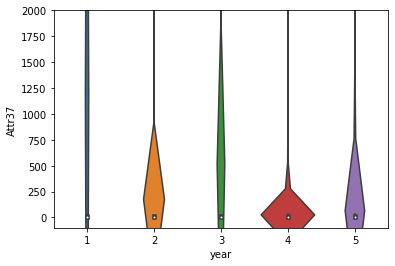

In [9]:
sns.violinplot(data=bankrupt_df, y="Attr37", x="year")
plt.ylim(-100, 2000)


In [10]:
print('mean: ',bankrupt_df.Attr37.groupby(bankrupt_df.year).mean())
print('median: ',bankrupt_df.Attr37.groupby(bankrupt_df.year).median())



mean:  year
1    173.453694
2     82.944360
3    102.697692
4     70.659877
5    114.025985
Name: Attr37, dtype: float64
median:  year
1    3.4383
2    2.8775
3    2.7273
4    3.1104
5    3.6564
Name: Attr37, dtype: float64


mean:  year
1    10.367516
2     2.645024
3     4.670725
4     1.218724
5     2.459377
Name: Attr21, dtype: float64
median:  year
1    1.137400
2    1.023500
3    0.955035
4    1.045700
5    1.117500
Name: Attr21, dtype: float64


(-250.0, 2000.0)

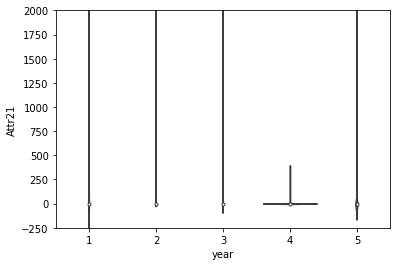

In [11]:
print('mean: ',bankrupt_df.Attr21.groupby(bankrupt_df.year).mean())
print('median: ',bankrupt_df.Attr21.groupby(bankrupt_df.year).median())
sns.violinplot(data=bankrupt_df, y="Attr21", x="year")
plt.ylim(-250, 2000)

In [12]:
from sklearn.impute import SimpleImputer

bankrupt_imputed = bankrupt_df
imputer = SimpleImputer(missing_values=np.nan, strategy='median',fill_value=None)
bankrupt_imputed.iloc[:,:] = imputer.fit_transform(bankrupt_imputed)


bankrupt_imputed.head(10)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,year,bankrupt
0,0.200550,0.379510,0.396410,2.0472,32.3510,0.38825,0.249760,1.33050,1.13890,0.50494,0.249760,0.659800,0.166600,0.249760,497.420,0.733780,2.6349,0.249760,0.149420,43.370,1.24790,0.214020,0.119980,0.477060,0.50494,0.604110,1.45820,1.76150,5.9443,0.11788,0.149420,94.1400,3.8772,0.56393,0.214020,1.74100,593.2700,0.50591,0.128040,0.662950,0.051402,0.128040,114.420,71.0500,1.00970,1.52250,49.394,0.185300,0.110850,2.04200,0.378540,0.25792,2.24370,2.2480,348690.0000,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.6580,4.4158,7.4277,1.0,0.0
1,0.209120,0.499880,0.472250,1.9447,14.7860,0.00000,0.258340,0.99601,1.69960,0.49788,0.261140,0.516800,0.158350,0.258340,677.960,0.538380,2.0005,0.258340,0.152000,87.981,1.42930,0.248060,0.123040,0.155100,0.39542,0.439920,88.44400,16.94600,3.6884,0.26969,0.152000,122.1700,2.9876,2.98760,0.206160,1.69960,3.0963,0.49788,0.121300,0.086422,0.064371,0.145950,199.490,111.5100,0.51045,1.12520,100.130,0.237270,0.139610,1.94470,0.499880,0.33472,17.86600,17.8660,2304.6000,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.3500,3.4000,60.9870,1.0,0.0
2,0.248660,0.695920,0.267130,1.5548,-1.1523,0.00000,0.309060,0.43695,1.30900,0.30408,0.312580,0.641840,0.244350,0.309060,794.160,0.459610,1.4369,0.309060,0.236100,73.133,1.42830,0.302600,0.189960,0.155100,0.28932,0.372820,86.01100,1.06270,4.3749,0.41929,0.238150,176.9300,2.0630,1.42740,0.315650,1.30900,2.3019,0.51537,0.241140,0.322020,0.074020,0.231170,165.510,92.3810,0.94807,1.01010,96.372,0.291810,0.222930,1.07580,0.481520,0.48474,1.20980,2.0504,6332.7000,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.2700,2.7185,5.2078,1.0,0.0
3,0.081483,0.307340,0.458790,2.4928,51.9520,0.14988,0.092704,1.86610,1.05710,0.57353,0.092704,0.301630,0.094257,0.092704,917.010,0.398030,3.2537,0.092704,0.071428,79.788,1.50690,0.115500,0.062782,0.171930,0.57353,0.361520,0.94076,1.96180,4.6511,0.14343,0.071428,91.3700,3.9948,0.37581,0.115500,1.35620,3.0963,0.57353,0.088995,0.401390,0.069622,0.088995,180.770,100.9800,0.28720,1.56960,84.344,0.085874,0.066165,2.49280,0.307340,0.25033,2.45240,2.4524,20545.0000,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.4350,4.2228,5.5497,1.0,0.0
4,0.187320,0.613230,0.229600,1.4063,-7.3128,0.18732,0.187320,0.63070,1.15590,0.38677,0.187320,0.331470,0.121820,0.187320,1133.200,0.322110,1.6307,0.187320,0.115530,57.045,1.04520,0.198320,0.115530,0.187320,0.38677,0.322110,1.41380,1.11840,4.1424,0.27884,0.115530,147.0400,2.4823,0.32340,0.198320,1.62780,11.2470,0.43489,0.122310,0.293040,0.096680,0.122310,141.620,84.5740,0.73919,0.95787,65.936,0.188110,0.116010,1.29590,0.565110,0.40285,1.88390,2.1184,3186.6000,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.2100,2.8692,7.8980,1.0,0.0
5,0.228220,0.497940,0.359690,1.7502,-47.7170,0.00000,0.281390,1.00830,1.97860,0.50206,0.286450,0.586910,0.148120,0.281390,620.140,0.588580,2.0083,0.281390,0.142220,107.260,1.72780,0.281040,0.115350,0.155100,0.49970,0.481810,55.51100,2.23590,4.3258,0.23382,0.144490,102.7600,3.5519,3.42000,0.275660,1.97860,22.3120,0.51361,0.139320,0.078634,0.056701,0.142040,147.840,40.5780,0.39250,0.53744,124.630,0.269350,0.136130,1.68520,0.479440,0.28154,3.12090,3.1927,7616.8000,0.139320,0.454570,0.85891,0.023002,3.4028,8.9949,88.4440,4.1269,12.2990,1.0,0.0
6,0.111090,0.647440,0.289710,1.4705,2.5349,0.00000,0.111090,0.54454,1.73480,0.35256,0.125750,0.180410,0.309630,0.111090,439.940,0.829650,1.5445,0.111090,0.064036,57.733,0.56811,0.000000,0.064036,0.155100,0.31469,0.829650,0.00000,3.06480,3.6770,0.36088,0.142230,328.7300,1.1103,1.0560

In [13]:
missing_values_imputed = pd.DataFrame(bankrupt_imputed.isna().sum())
missing_values_imputed = missing_values_imputed.rename(columns={missing_values_imputed.columns[0]: 'count'})
missing_values_imputed = missing_values_imputed.sort_values(by='count', key=abs, ascending=False)
missing_values_imputed.head()

,count
Attr1,0
Attr50,0
Attr36,0
Attr37,0
Attr38,0


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_index, test_valid_index in split.split(bankrupt_imputed, bankrupt_imputed.bankrupt):
    bankrupt_modeling = bankrupt_imputed.iloc[train_index]
    bankrupt_validation = bankrupt_imputed.iloc[test_valid_index]

print("Size of modeling set (to be CV split): ",bankrupt_modeling.shape)
print("Size of hold back validation set: ",bankrupt_validation.shape)

Size of modeling set (to be CV split):  (39064, 66)
Size of hold back validation set:  (4341, 66)


In [21]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 22)

print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))
print("Before OverSampling, counts of label '1': {} \n".format(sum(y_train == 1)))

X_balanced, y_balanced = sm.fit_resample(X_train, y_train.ravel()) 

print("After OverSampling, counts of label '0': {}".format(sum(y_balanced == 0)))
print("After OverSampling, counts of label '1': {} \n".format(sum(y_balanced == 1)))

X_train = X_balanced
y_train = y_balanced


Before OverSampling, counts of label '0': 37182
Before OverSampling, counts of label '1': 1882 

After OverSampling, counts of label '0': 37182
After OverSampling, counts of label '1': 37182 



In [22]:


#Create new X predictor matrix for validation
X_validation = bankrupt_validation.drop(['bankrupt'],axis=1).values #droping target
y_validation = bankrupt_validation['bankrupt'].values
y_validation = y_validation.astype(int)


In [23]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

num_cv_iterations = 10
cv_object = StratifiedKFold(n_splits=num_cv_iterations, shuffle=True, random_state=27)

In [24]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


scorer = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score)
}

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

cv_results = sklearn.model_selection.cross_validate(rf, X_train, y_train, cv=cv_object, scoring=scorer, return_estimator=True, n_jobs=6) 
print("Mean Accuracy = ",cv_results['test_accuracy'].mean())
print("Mean Recall = ",cv_results['test_recall'].mean())
print("Mean Precision = ",cv_results['test_precision'].mean())

from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Mean Accuracy =  0.9832714905619614
Mean Recall =  0.9888387069525507
Mean Precision =  0.9779533259779546
Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [84]:
rf = RandomForestClassifier()

training_model = rf.fit(X_train,y_train)
rf_validation_predictions = training_model.predict(X_validation)

print(rf_validation_predictions)

print("Validation Set Accuracy: ", accuracy_score(y_validation, rf_validation_predictions))
print("Validation Set Precision: ", precision_score(y_validation, rf_validation_predictions))
print("Validation Set Recall: ", recall_score(y_validation, rf_validation_predictions))

[0 0 0 ... 0 0 0]
Validation Set Accuracy:  0.9553098364432159
Validation Set Precision:  0.5405405405405406
Validation Set Recall:  0.4784688995215311


In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_validation,rf_validation_predictions, 
                            target_names=['Not Bankrupt','Bankrupt']))

              precision    recall  f1-score   support

Not Bankrupt       0.97      0.98      0.98      4132
    Bankrupt       0.54      0.48      0.51       209

    accuracy                           0.96      4341
   macro avg       0.76      0.73      0.74      4341
weighted avg       0.95      0.96      0.95      4341



In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [50, 100, 300],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10, 15]
}

# Random search of parameters search across 100 different combinations, and use all available scores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 10, cv = cv_object, verbose=2, random_state=42, n_jobs = 6, scoring='accuracy')
# Fit the random search model
rf_random.fit(X_train, y_train)

print("Best Accuracy: ",rf_random.best_score_)
print("Best Accuracy: ",rf_random.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END min_samples_leaf=15, min_samples_split=10, n_estimators=300; total time= 2.2min
[CV] END min_samples_leaf=15, min_samples_split=10, n_estimators=300; total time= 2.2min
[CV] END min_samples_leaf=15, min_samples_split=10, n_estimators=300; total time= 2.2min
[CV] END min_samples_leaf=15, min_samples_split=10, n_estimators=300; total time= 2.2min
[CV] END min_samples_leaf=15, min_samples_split=10, n_estimators=300; total time= 2.2min
[CV] END min_samples_leaf=15, min_samples_split=10, n_estimators=300; total time= 2.2min
[CV] END min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=  46.8s
[CV] END min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=  47.4s
[CV] END min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=  46.8s
[CV] END min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=  46.9s
[CV] END min_samples_leaf=15, min_samples_split=10, n_e

In [30]:
from sklearn.metrics import confusion_matrix

def plot_confusion(cf_matrix):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=2)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
    cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n' for v1, v2 in
    zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    x_axis_labels = ['Not Bankrupt','Bankrupt']
    y_axis_labels = ['Not Bankrupt','Bankrupt']
    ax = plt.axes()
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues',xticklabels=x_axis_labels, yticklabels=y_axis_labels)
    ax.set_title('   Bankruptcy Confusion Matrix\n')
    plt.xlabel("Predicted Category")
    plt.ylabel("True Category")

In [86]:
# Best Accuracy:  'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1
from sklearn.model_selection import cross_val_score


rf = RandomForestClassifier(n_estimators=300, min_samples_split=10, min_samples_leaf=1)

training_model = rf.fit(X_train,y_train)
rf_validation_predictions = training_model.predict(X_validation)

print(rf_validation_predictions)

print("Validation Set Accuracy: ", accuracy_score(y_validation, rf_validation_predictions))
print("Validation Set Precision: ", precision_score(y_validation, rf_validation_predictions))
print("Validation Set Recall: ", recall_score(y_validation, rf_validation_predictions))




[0 0 0 ... 0 0 0]
Validation Set Accuracy:  0.953927666436305
Validation Set Precision:  0.5238095238095238
Validation Set Recall:  0.47368421052631576


In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_validation,rf_validation_predictions, 
                            target_names=['Not Bankrupt','Bankrupt']))

              precision    recall  f1-score   support

Not Bankrupt       0.97      0.98      0.98      4132
    Bankrupt       0.52      0.47      0.50       209

    accuracy                           0.95      4341
   macro avg       0.75      0.73      0.74      4341
weighted avg       0.95      0.95      0.95      4341



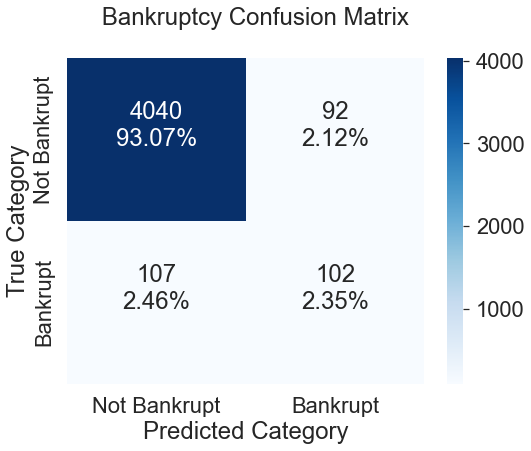

In [70]:
cm = confusion_matrix(y_validation,rf_validation_predictions)
plot_confusion(cm)

In [71]:
from sklearn.metrics import classification_report
print(classification_report(y_validation,rf_validation_predictions, 
                            target_names=['Not Bankrupt','Bankrupt']))

              precision    recall  f1-score   support

Not Bankrupt       0.97      0.98      0.98      4132
    Bankrupt       0.53      0.49      0.51       209

    accuracy                           0.95      4341
   macro avg       0.75      0.73      0.74      4341
weighted avg       0.95      0.95      0.95      4341



## XGBoost

In [47]:
import xgboost as xgb

In [48]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_validation, y_validation)

In [49]:
eval_list = [(dtest,'eval'), (dtrain, 'train')]

In [50]:
num_round = 200
param = {
    'max_depth':10,
    'objective':'multi:softmax',
    'num_class':2,
    'eta': 0.01
}

In [51]:
xgb_model1 = xgb.train(param, dtrain, num_round, eval_list, early_stopping_rounds=2)

[09:47:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	eval-mlogloss:0.68613	train-mlogloss:0.68558
[1]	eval-mlogloss:0.67925	train-mlogloss:0.67821
[2]	eval-mlogloss:0.67253	train-mlogloss:0.67098
[3]	eval-mlogloss:0.66595	train-mlogloss:0.66390
[4]	eval-mlogloss:0.65952	train-mlogloss:0.65693
[5]	eval-mlogloss:0.65321	train-mlogloss:0.65009
[6]	eval-mlogloss:0.64697	train-mlogloss:0.64335
[7]	eval-mlogloss:0.64088	train-mlogloss:0.63677
[8]	eval-mlogloss:0.63487	train-mlogloss:0.63027
[9]	eval-mlogloss:0.62893	train-mlogloss:0.62384
[10]	eval-mlogloss:0.62311	train-mlogloss:0.61757
[11]	eval-mlogloss:0.61733	train-mlogloss:0.61136
[12]	eval-mlogloss:0.61168	train-mlogloss:0.60522
[13]	eval-mlogloss:0.60616	train-mlogloss:0

In [89]:
from sklearn.metrics import accuracy_score
print('Training Accuracy: ',accuracy_score(xgb_model1.predict(dtrain),y_train))
print('Test Accuracy: ',accuracy_score(xgb_model1.predict(dtest),y_validation))

Training Accuracy:  0.9822225808186758
Test Accuracy:  0.949090071412117


In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_validation,xgb_model1.predict(dtest), 
                            target_names=['Not Bankrupt','Bankrupt']))

              precision    recall  f1-score   support

Not Bankrupt       0.98      0.97      0.97      4132
    Bankrupt       0.47      0.55      0.51       209

    accuracy                           0.95      4341
   macro avg       0.73      0.76      0.74      4341
weighted avg       0.95      0.95      0.95      4341



random grid search

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import time

xgb_clf = XGBClassifier(use_label_encoder=False)

num_searches = 10

params = {
        'n_estimators':[500,1000],
        'eta':[0.001, 0.01,0.1],
        'max_depth':[5,15,20],
        'max_leaves': [30,50,70],
        'min_child_weight': [5, 10, 15],
        'gamma': [1, 1.5, 2, 2.5],
        'subsample': [0.6, 0.8, 1.0],
        'scale_pos_weight': [1,10,20,30]
        }

fit_params = {
'early_stopping_rounds': 5,
'eval_metric': 'logloss',
'eval_set': [[X_train,y_train]]
}


rs_clf = RandomizedSearchCV(xgb_clf, param_distributions=params, n_iter=num_searches, scoring='accuracy', n_jobs=6, cv=cv_object, verbose=3, random_state=42)
print("Randomized search..")
search_time_start = time.time()
rs_clf.fit(X_train, y_train, **fit_params)
print("Randomized search time:", time.time() - search_time_start)

Randomized search..
Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning

[0]	validation_0-logloss:0.67759
[0]	validation_0-logloss:0.67407
[0]	validation_0-logloss:0.67392
[0]	validation_0-logloss:0.67366
[0]	validation_0-logloss:0.67356
[0]	validation_0-logloss:0.67453
[1]	validation_0-logloss:0.66246
[1]	validation_0-logloss:0.66538
[1]	validation_0-logloss:0.66455
[1]	validation_0-logloss:0.66525
[1]	validation_0-logloss:0.66507
[1]	validation_0-logloss:0.66566
[2]	validation_0-logloss:0.65914
[2]	validation_0-logloss:0.66251
[2]	validation_0-logloss:0.66230
[2]	validation_0-logloss:0.66087
[2]	validation_0-logloss:0.66201
[2]	validation_0-logloss:0.66239
[3]	validation_0-logloss:0.66026
[3]	validation_0-logloss:0.66683
[3]	validation_0-logloss:0.66401
[3]	validation_0-logloss:0.65768
[3]	validation_0-logloss:0.65823
[3]	validation_0-logloss:0.66379
[4]	validation_0-logloss:0.66630
[4]	validation_0-logloss:0.66405
[4]	validation_0-logloss:0.66930
[4]	validation_0-logloss:0.66283
[4]	validation_0-logloss:0.66366
[4]	validation_0-logloss:0.66887
[5]	valida

In [55]:
best_score = rs_clf.best_score_
best_params = rs_clf.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best score: 0.9910036814169993
Best params: 
eta: 0.1
gamma: 1.5
max_depth: 20
max_leaves: 30
min_child_weight: 5
n_estimators: 500
scale_pos_weight: 1
subsample: 0.8


In [56]:
param = {
    'max_depth':20,
    'max_leaves': 30,
    'min_child_weight': 5,
    'n_estimators': 500,
    'scale_pos_weight': 1,
    'subsample': 0.8,
    'objective':'multi:softmax',
    'num_class':2,
    'eta': 0.1,
    'gamma': 1.5
}

fit_params = {
'early_stopping_rounds': 5,
'eval_metric': 'logloss',
'eval_set': [[X_train,y_train]]
}

XGBC_final = XGBClassifier(params=param, **fit_params, cv=cv_object)

XGBC_final.fit(X_train, y_train, eval_set=[[X_validation,y_validation]], eval_metric='logloss', early_stopping_rounds=5)

XGBC_final_predictions = XGBC_final.predict(X_validation)
accuracy_score(XGBC_final_predictions,y_validation)



/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:20:23] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-logloss:0.55730
[1]	validation_0-logloss:0.47404
[2]	validation_0-logloss:0.42454
[3]	validation_0-logloss:0.38014
[4]	validation_0-logloss:0.33731
[5]	validation_0-logloss:0.30865
[6]	validation_0-logloss:0.28846
[7]	validation_0-logloss:0.27040
[8]	validation_0-logloss:0.25528
[9]	validation_0-logloss:0.24215
[10]	validation_0-logloss:0.23413
[11]	validation_0-logloss:0.22228
[12]	validation_0-logloss:0.20974
[13]	validation_0-logloss:0.20356
[14]	validation_0-logloss:0.19678
[15]	validation_0-logloss:0.19016
[

0.9776549182216079

In [91]:
from sklearn.metrics import classification_report
print(classification_report(y_validation,XGBC_final_predictions, 
                            target_names=['Not Bankrupt','Bankrupt']))

              precision    recall  f1-score   support

Not Bankrupt       0.98      0.99      0.99      4132
    Bankrupt       0.85      0.65      0.74       209

    accuracy                           0.98      4341
   macro avg       0.92      0.82      0.86      4341
weighted avg       0.98      0.98      0.98      4341



/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/yellowbrick/classifier/prcurve.py:254: YellowbrickWarning: micro=True is ignored;specify per_class=False to draw a PR curve after micro-averaging
  warnings.warn(


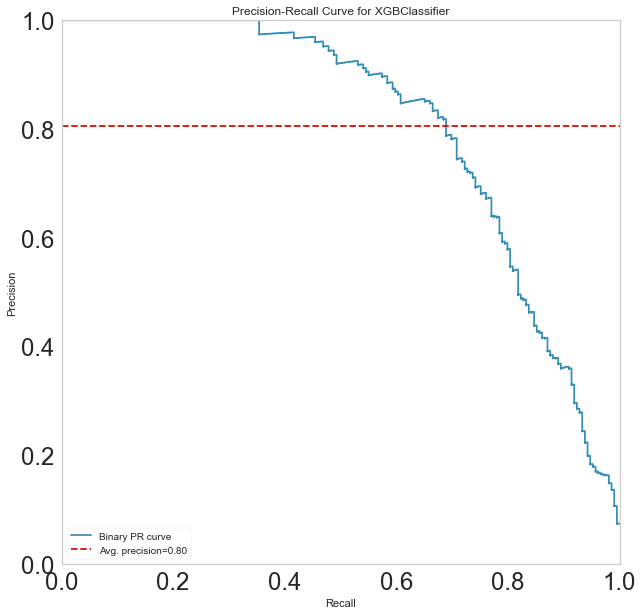

<AxesSubplot:title={'center':'Precision-Recall Curve for XGBClassifier'}, xlabel='Recall', ylabel='Precision'>

In [57]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(XGBC_final, per_class=True, size=(720, 720))
viz.fit(X_train, y_train)
viz.score(X_validation, y_validation)
for legend in viz.ax.texts:
    legend.set_fontsize(24)
for xtick,ytick in zip(viz.ax.xaxis.get_major_ticks(),viz.ax.yaxis.get_major_ticks()):
    xtick.label.set_fontsize(24) 
    ytick.label.set_fontsize(24)
viz.show()

/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:38:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:38:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:38:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:39:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:39:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:39:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:39:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:39:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:40:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:40:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:40:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:40:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:40:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:41:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:41:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:41:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:41:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:41:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:00] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:43:49] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:44:01] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:44:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:44:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:44:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:44:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:45:06] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:45:17] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:45:30] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:45:42] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:45:54] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:46:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:46:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:46:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:46:45] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:46:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:47:10] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:47:22] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:47:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:47:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:48:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:48:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:48:28] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1644955241195/work/src/learner.cc:576: 
Parameters: { "cv", "early_stopping_rounds", "eval_set", "params" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




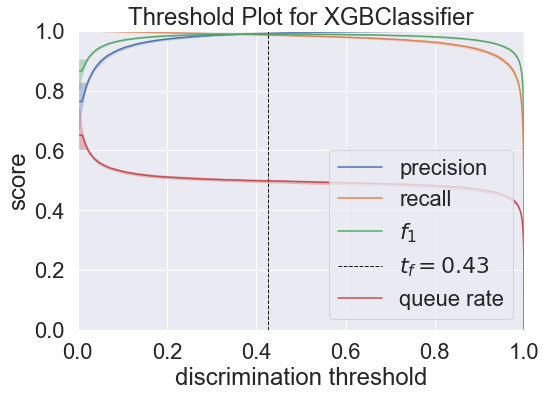

<AxesSubplot:title={'center':'Threshold Plot for XGBClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [106]:
from yellowbrick.classifier import DiscriminationThreshold

# Instantiate the classification model and visualizer
visualizer = DiscriminationThreshold(XGBC_final)

visualizer.fit(X_train, y_train)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [59]:
XGBC_final_proba = XGBC_final.predict_proba(X_validation)

In [60]:
XGBC_final_proba

array([[9.9977165e-01, 2.2833767e-04],
       [8.4436309e-01, 1.5563694e-01],
       [9.8837388e-01, 1.1626115e-02],
       ...,
       [9.7634155e-01, 2.3658430e-02],
       [9.9529290e-01, 4.7070878e-03],
       [9.9930716e-01, 6.9285691e-04]], dtype=float32)

Accuracy:  0.9686708131766874
Precision:  0.3492822966507177
Recall:  1.0


Text(0.5, 1.0, '   Confusion Matrix, cutoff = 0.18\n')

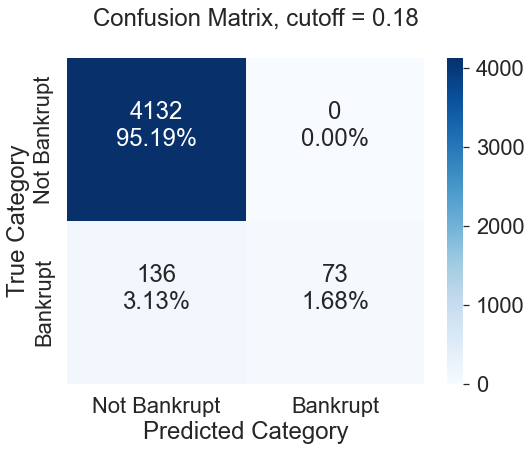

In [105]:
cutoff=0.94
XGBC_final_proba = XGBC_final.predict_proba(X_validation)
XGBC_class1_pred0_5 = pd.DataFrame(XGBC_final_proba[:,1:2])


XGBC_class1_pred0_5[XGBC_class1_pred0_5<cutoff]=0
XGBC_class1_pred0_5[XGBC_class1_pred0_5>=cutoff]=1

print("Accuracy: ",accuracy_score(XGBC_class1_pred0_5,y_validation))
print("Precision: ",precision_score(XGBC_class1_pred0_5,y_validation))
print("Recall: ",recall_score(XGBC_class1_pred0_5,y_validation))

cm = confusion_matrix(y_validation,XGBC_class1_pred0_5)
plot_confusion(cm)
plt.title('   Confusion Matrix, cutoff = 0.18\n')


Classification Report for base xgb model

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_validation,xgb_model1.predict(dtest), 
                            target_names=['Not Bankrupt','Bankrupt']))

              precision    recall  f1-score   support

Not Bankrupt       0.98      0.97      0.97      4132
    Bankrupt       0.47      0.55      0.51       209

    accuracy                           0.95      4341
   macro avg       0.73      0.76      0.74      4341
weighted avg       0.95      0.95      0.95      4341



Classification Report for tuned XGBC with standard 0.5 cutoff

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_validation,XGBC_final_predictions, 
                            target_names=['Not Bankrupt','Bankrupt']))

              precision    recall  f1-score   support

Not Bankrupt       0.98      0.99      0.99      4132
    Bankrupt       0.85      0.65      0.74       209

    accuracy                           0.98      4341
   macro avg       0.92      0.82      0.86      4341
weighted avg       0.98      0.98      0.98      4341



Classification Report for tuned XGBC with optimized 0.18 cutoff

In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_validation,XGBC_class1_pred0_5, 
                            target_names=['Not Bankrupt','Bankrupt']))

              precision    recall  f1-score   support

Not Bankrupt       0.98      0.99      0.99      4132
    Bankrupt       0.83      0.67      0.74       209

    accuracy                           0.98      4341
   macro avg       0.91      0.83      0.86      4341
weighted avg       0.98      0.98      0.98      4341



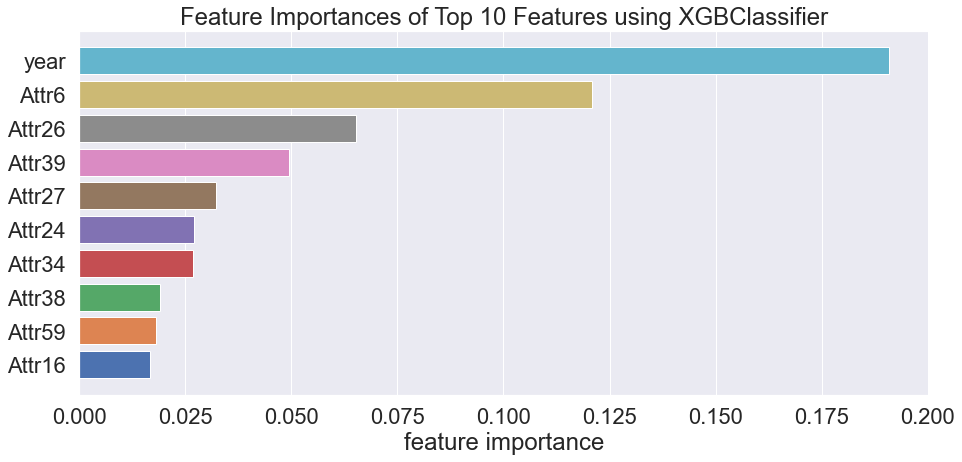

<AxesSubplot:title={'center':'Feature Importances of Top 10 Features using XGBClassifier'}, xlabel='feature importance'>

In [107]:

from yellowbrick.model_selection import FeatureImportances
features=bankrupt_modeling.drop(['bankrupt'],axis=1).columns

X_as_df = pd.DataFrame(bankrupt_modeling.drop(['bankrupt'],axis=1))
df_base = X_as_df.set_axis(features, axis=1, inplace=False)

viz = FeatureImportances(XGBC_final, stack=False, relative=False, topn=10, size=(1000, 500))
viz.fit(df_base, y_train)
#viz.ax.legend(bbox_to_anchor=(1.0, 0.5), fontsize=16)
viz.show()

In [111]:
yellowbrick.style.colors.get_color_cycle()

AttributeError: 'XGBClassifier' object has no attribute 'style'

In [ ]:
predictions=pd.DataFrame(XGBC_final_predictions)
predictions.rename(columns={predictions.columns[0]: "Prediction"}, inplace = True)

df = bankrupt_validation.reset_index()

classification_df = pd.concat([df,predictions],axis=1)

classification_df.head(10)


,index,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,year,bankrupt,Prediction
0,641,0.002029,0.170170,0.468280,3.85210,71.047,-0.063571,0.002025,4.67660,0.97222,0.79584,0.002025,0.012333,0.036568,0.002025,1657.60,0.220190,5.87630,0.002025,0.001976,94.536,1.12390,-0.020502,0.001980,-0.066082,0.79584,0.22022,-0.19451,1.274100,4.7622,0.127600,0.001976,56.859,6.4194,-0.120470,-0.020502,1.07230,61.3490,0.80182,-2.000700e-02,0.251430,0.374360,-0.020007,210.580,116.040,0.007645,2.23560,91.910,-0.055948,-0.054598,3.71660,0.164190,0.155780,2.16540,2.18170,27082.00,-0.028576,0.002550,1.02860,0.007518,3.8610,3.1454,58.484,6.2410,2.7881,5.0,0.0,0
1,6271,0.025793,0.786960,-0.213750,0.72640,-54.675,-1.203700,0.034736,0.27071,1.90870,0.21304,0.178730,0.044461,0.063757,0.034736,2360.40,0.154630,1.27070,0.034736,0.018199,10.139,1.21970,0.163390,0.013513,-0.196000,-1.17790,0.14327,1.13470,-0.494240,3.0768,0.334420,0.018199,154.490,2.3626,2.345500,0.062842,1.90870,3.0963,0.21304,3.292400e-02,0.190740,0.104780,0.085603,80.028,69.889,0.486470,0.65853,10.484,0.076432,0.040044,0.72114,0.781260,0.423250,0.49258,0.49258,-255.11,0.032924,0.121070,0.98284,0.000000,35.9990,5.2226,149.400,2.4431,4.4132,4.0,0.0,0
2,8655,0.012404,0.720360,-0.034724,0.94310,-75.829,0.046774,0.012404,0.37758,1.03780,0.27199,0.012404,0.020325,0.032798,0.012404,5425.90,0.067270,1.38820,0.012404,0.008396,63.151,1.34160,0.054152,0.008396,0.053567,0.27199,0.06727,0.38037,-0.081815,4.7597,0.486350,0.008396,156.470,2.3328,0.075174,0.054152,1.54800,2.9070,0.38206,3.665200e-02,0.006127,0.262540,0.036652,141.270,78.118,0.048524,0.52425,65.536,0.018098,0.012249,0.79901,0.610300,0.428680,0.64086,0.90018,-1996.60,0.036397,0.045604,0.96360,0.404650,5.7798,4.6724,150.770,2.4209,3.4811,3.0,0.0,0
3,3434,0.086075,0.410880,0.572920,2.40230,74.942,0.028634,0.114200,1.43380,1.97330,0.58912,0.172040,0.279520,0.061358,0.114200,1238.70,0.294670,2.43380,0.114200,0.057871,35.417,0.75325,0.149080,0.043620,0.405050,0.55737,0.22623,2.57720,30.914000,4.1972,-0.117110,0.058471,81.696,4.4678,4.442400,0.147970,1.97330,3.0963,0.58912,7.498800e-02,1.578400,0.087815,0.075551,62.260,26.843,0.449540,1.93370,38.288,0.142210,0.072065,2.38870,0.408550,0.223830,31.78900,31.78900,9021.20,0.074988,0.146110,0.94283,0.000000,10.3060,13.5980,75.570,4.8300,106.4800,3.0,0.0,0
4,5973,0.110330,0.069465,0.877820,22.39200,700.830,0.000000,0.137430,13.39600,0.38688,0.93054,0.139160,3.349100,0.404400,0.137430,162.06,2.252200,14.39600,0.137430,0.355240,333.590,0.85521,0.099270,0.285170,0.316530,0.92745,1.86200,57.60600,10.817000,4.2093,-1.187600,0.359690,52.016,7.0170,4.145200,0.098932,0.38688,3.0963,0.93054,2.557200e-01,12.906000,0.019575,0.256590,367.240,33.647,0.312030,13.77500,448.200,0.080251,0.207430,13.22800,0.041035,0.142510,11.46700,11.46700,14215.00,0.255720,0.118560,0.68193,0.000000,1.0942,10.8480,38.715,9.4279,4.7674,4.0,0.0,0
5,4058,0.043207,0.114740,0.100240,1.87360,10.938,0.096319,0.045438,7.05580,1.02940,0.80958,0.045438,0.396010,0.094265,0.045438,290.22,1.257700,8.71540,0.045438,0.029682,10.795,1.03850,0.041475,0.028224,0.123170,0.80958,1.23820,0.27890,0.127680,4.7965,0.073554,0.029682,28.162,12.9610,0.361480,0.041475,1.55820,3.0963,0.80958,2.709300e-02,0.130030,0.026879,0.027093,47.699,36.904,0.954340,1.47900,11.112,-0.057391,-0.037490,1.87360,0.114740,0.077157,1.03130,1.03130,6274.30,0.028589,0.053370,0.97141,0.000000,33.8130,9.8904,27.357,13.3420,1.9501,3.0,0.0,0
6,8054,-0.275260,1.699100,-0.716100,0.57854,-160.560,-0.520430,-0.275260,-0.41145,2.03190,-0.69909,-0.269970,-0.162010,-0.131550,-0.275260,-2320.20,-0.157310,0.58855

In [ ]:
classification_df.groupby(['bankrupt','Prediction']).count()


index  Attr1  Attr2  Attr3  Attr4  Attr5  Attr6  Attr7  \
bankrupt Prediction                                                           
0.0      0            4121   4121   4121   4121   4121   4121   4121   4121   
         1              11     11     11     11     11     11     11     11   
1.0      0              84     84     84     84     84     84     84     84   
         1             125    125    125    125    125    125    125    125   

                     Attr8  Attr9  Attr10  Attr11  Attr12  Attr13  Attr14  \
bankrupt Prediction                                                         
0.0      0            4121   4121    4121    4121    4121    4121    4121   
         1              11     11      11      11      11      11      11   
1.0      0              84     84      84      84      84      84      84   
         1             125    125     125     125     125     125     125   

                     Attr15  Attr16  Attr17  Attr18  Attr19  Attr20  Attr21  \
bankrupt Prediction                                                           
0.0      0             4121    4121    4121    4121    4121    4121    4121   
         1               11      11      11      11      11      11      11   
1.0      0               84      84      84      84      84      84      84   
         1              125     125     125     125     125     125     125   

                     Attr22  Attr23  Attr24  Attr25  Attr26  Attr27  Attr28  \
bankrupt Prediction                                                           
0.0      0             4121    4121    4121    4121    4121    4121    4121   
         1               11      11      11      11      11      11      11   
1.0      0               84      84      84      84      84      84      84   
         1              125     125     125     125     125     125     125   

                     Attr29  Attr30  Attr31  Attr32  Attr33  Attr34  Attr35  \
bankrupt Prediction                                                           
0.0      0             4121    4121    4121    4121    4121    4121    4121   
         1               11      11      11      11      11      11      11   
1.0      0               84      84      84      84      84      84      84   
         1              125     125     125     125     125     125     125   

                     Attr36  Attr37  Attr38  Attr39  Attr40  Attr41  Attr42  \
bankrupt Prediction                                                           
0.0      0             4121    4121    4121    4121    4121    4121    4121   
         1               11      11      11      11      11      11      11   
1.0      0               84      84      84      84      84      84      84   
         1              125     125     125     125     125     125     125   

                     Attr43  Attr44  Attr45  Attr46  Attr47  Attr48  Attr49  \
bankrupt Prediction                                                           
0.0      0             4121    4121    4121    4121    4121    4121    4121   
         1               11      11      11      11      11      11      11   
1.0      0               84      84      84      84      84      84      84   
         1              125     125     125     125     125     125     125   

                     Attr50  Attr51  Attr52  Attr53  Attr54  Attr55  Attr56  \
bankrupt Prediction                                                           
0.0      0             4121    4121    4121    4121    4121    4121    4121   
         1               11      11      11      11      11      11      11   
1.0      0               84      84      84      84      84      84      84   
         1              125     125     125     125     125     125     125   

                     Attr57  Attr58  Attr59  Attr60  Attr61  Attr62  Attr63  \
bankrupt Prediction                                                           
0.0      0             4121    4121    4121    4121    4121    4121    4121

In [ ]:
false_positives=classification_df[(classification_df.bankrupt==0) & (classification_df.Prediction==1)]
false_positives.head(12)

,index,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,year,bankrupt,Prediction
174,6701,0.089414,0.656650,0.183220,1.33280,-47.967,0.000000,0.112660,0.522880,2.25580,0.343350,0.144780,0.204630,0.062435,0.112660,1701.800,0.214480,1.52290,0.112660,0.049942,54.060,1.10370,0.133240,0.039638,0.237820,0.325260,0.179090,4.14750,0.68825,4.74260,0.29109,0.061810,123.800,2.99080,2.50760,0.132010,2.25580,5.15400,0.420900,0.058522,0.117620,0.135590,0.059067,108.250,54.1920,0.267620,0.725950,74.061,0.105060,0.046574,1.11750,0.550560,0.334360,1.289700,1.58100,10129.000,0.280410,0.26042,0.74418,0.22586,6.7518,6.73530,89.083,4.09730,8.4735,1.0,0.0,1
616,4349,7.368800,480.730000,-479.730000,0.00208,-182370.000,-508.120000,7.368800,-0.997920,0.16346,-479.730000,7.373300,0.015328,45.081000,7.368800,23812.000,0.015328,0.00208,7.368800,45.081000,0.000,0.11371,-0.073905,45.081000,-60.742000,-500.750000,0.015328,-16.65800,0.46539,0.93273,2940.50000,45.109000,185290.000,0.00197,0.00197,-0.783540,0.16346,3.09630,-479.730000,-4.793600,0.000180,-216.820000,-0.452140,2039.300,2039.3000,0.282825,0.002080,0.000,-0.073905,-0.452140,0.00208,480.730000,507.640000,1.205300,1.37670,-4108.900,-4.793600,-0.01536,0.13864,0.00000,9.7917,0.17898,1073500.000,0.00034,4.2825,3.0,0.0,1
919,849,-0.026123,1.025000,-0.050225,0.95100,-76.217,0.000000,-0.026123,-0.024381,0.67433,-0.024991,-0.026116,-0.025487,-0.019869,-0.026123,-27923.000,-0.013072,0.97562,-0.026123,-0.038739,52.768,0.49709,-0.037050,-0.038739,1.102600,-0.026123,-0.013072,-5234.60000,-1.98960,2.84910,0.23290,-0.038739,525.920,0.69402,0.69401,-0.037022,0.67433,3.09630,-0.024991,-0.054902,0.846980,-1.404600,-0.054944,57.711,4.9437,-0.267970,0.855890,50.021,-0.049775,-0.073814,0.95099,1.025000,1.440900,-0.989960,-0.98996,-35.480,-0.054904,1.04530,1.03810,0.00000,6.9171,73.83200,554.800,0.65790,26.7120,4.0,0.0,1
2225,6722,0.053870,0.732710,-0.142850,0.75763,-60.154,0.000000,0.053870,0.364790,2.21390,0.267290,0.078781,0.091399,0.024333,0.053870,4964.600,0.073521,1.36480,0.053870,0.024333,34.133,1.04520,0.093691,0.024333,0.053870,0.263070,0.073521,3.76100,-0.25810,4.07420,0.31269,0.030054,483.690,3.61340,2.90660,0.089619,2.22350,1.67120,0.410610,0.040481,0.078810,0.260680,0.042320,65.964,31.8310,0.260200,0.406380,35.482,0.000000,0.000000,0.60944,0.589390,1.325200,0.482950,0.74190,-1694.500,0.799100,0.20154,0.96903,0.53619,10.6930,11.46700,97.173,3.75620,4.0001,1.0,0.0,1
2518,5243,-0.112330,0.958210,-0.121570,0.81937,-61.041,-0.029304,-0.112330,0.043611,2.14260,0.041788,-0.054119,-0.166900,0.008918,-0.112330,18303.000,0.019942,1.04360,-0.112330,-0.052428,40.824,0.99958,-0.054284,-0.052428,-0.141640,-0.141640,0.019942,-0.93251,-0.27104,3.33860,0.44721,-0.032491,108.620,3.36050,2.36040,-0.119130,2.14260,2.89470,0.149510,-0.055598,0.000041,0.413970,-0.025336,93.940,53.1170,-0.468750,0.463320,38.673,-0.185720,-0.086682,0.57552,0.673040,0.297580,0.093167,0.33334,-265.110,-0.055598,-2.68810,1.05090,2.57790,8.9409,6.87170,114.650,3.18350,4.7769,5.0,0.0,1
2859,3882,-1.032900,0.066193,0.447690,7.76330,62.815,-0.017210,-1.032900,14.107000,0.76548,0.933810,-1.032900,-15.604000,-1.152400,-1.032900,-27.389,-13.326000,15.10700,-1.032900,-1.349300,70.558,0.11110,-1.032900,-1.349300,-0.142160,0.737480,-13.326000,1.08410,0.92094,2.40600,-0.27709,-1.349300,13.587,26.86400,26.86400,-1.012700,0.76548,3.09630,0.933810,-1.323000,4.442200,-0.002501,-1.349400,104.820,34.2660,-6.980000,5.527800,30.373,-1.183700,-1.546300,7.76330,0.066193,0.037224,1.920900,1.92090,114.020,-1.323000,-1.10610,2.30740,0.00000,5.1731,10.65200,31.562,11.56400,1.5747,3.0,0.0,1
2

In [ ]:
false_positives.groupby('year').count()

,index,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,bankrupt,Prediction
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3.0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
5.0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [ ]:
false_negatives=classification_df[(classification_df.bankrupt==1) & (classification_df.Prediction==0)]
false_negatives.head(85)

,index,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,year,bankrupt,Prediction
39,10044,0.068693,0.712990,0.000907,1.001700,-134.93000,0.003831,0.089011,0.402550,0.877410,0.287010,0.111710,0.162260,0.101450,0.089011,2923.700,0.124840,1.40250,0.089011,0.101450,88.897000,1.11010,0.051203,0.078290,0.121800,0.278470,0.096345,2.25590,0.002013,5.0817,0.789520,0.125380,332.4600,1.12550,0.865980,0.056824,0.877410,2.731000,0.409960,0.064763,0.070883,0.464160,0.058356,212.400,123.5100,0.321450,0.612100,126.330000,0.051203,0.058356,0.770660,0.548560,0.888460,0.637060,0.909960,109.490,0.313590,0.239340,0.72957,0.428370,4.1059,2.955300,228.2000,1.599500,1.947500,3.0,1.0,0
58,6900,-0.479160,0.864660,-0.005038,0.961070,-25.82400,-0.126350,-0.479160,0.156520,0.303660,0.135340,-0.120320,-3.702700,-1.392300,-0.479160,-746.460,-0.488980,1.15650,-0.479160,-1.577900,21.394000,1.04520,-0.124620,-1.577900,-0.479160,-0.361060,-0.488980,-0.34728,-0.005754,4.3063,2.633500,-1.498700,112.9000,3.32900,0.498230,-0.114640,0.310490,0.145690,0.866840,-0.377520,0.533000,-0.422240,-0.410380,66.585,45.1910,-26.921000,0.670540,15.080000,-0.180970,-0.595970,0.143840,0.129410,0.300390,0.154560,0.989960,-102.000,-0.377680,-3.540500,1.38750,5.405100,17.0610,8.076800,155.5500,2.346600,0.346800,1.0,1.0,0
69,10160,0.202010,0.362060,0.536010,2.652500,148.69000,0.000000,0.249170,1.761800,1.301600,0.637890,0.254660,0.768210,0.191430,0.249170,530.370,0.688200,2.76190,0.249170,0.191430,19.360000,1.01410,0.182450,0.155200,0.573480,0.455910,0.557950,1005.50000,3.838600,4.3256,-0.005264,0.191570,128.8800,3.46570,3.104700,0.182260,1.373500,3.096300,0.637890,0.140030,1.145700,0.066149,0.140170,137.060,117.7000,2.926100,1.358500,22.417000,0.182450,0.140170,2.376300,0.324350,0.288550,4.568200,4.568200,11343.000,0.294280,0.316690,0.67228,0.000000,18.8540,3.101200,90.9550,4.013000,9.321500,3.0,1.0,0
121,6951,0.012653,0.659670,-0.032487,0.941990,-34.06100,0.000000,0.019528,0.515910,2.546300,0.340330,0.039448,0.034870,0.028882,0.019528,3274.000,0.111480,1.51590,0.019528,0.007669,28.031000,1.52190,0.037398,0.004969,0.073042,0.319020,0.101060,1.87730,-0.068760,3.9810,0.258990,0.013705,82.3170,4.48350,3.806200,0.063280,2.550200,3.628100,0.431830,0.024851,0.008207,0.240550,0.014687,74.959,46.9280,0.064706,0.357400,28.427000,-0.016617,-0.006526,0.799680,0.560010,0.223040,0.720320,0.913980,-311.000,0.024819,0.037179,0.98456,0.268860,13.0210,7.777900,80.2740,4.546900,5.389300,1.0,1.0,0
138,5520,-0.107300,0.342880,0.313290,1.913700,-12.14900,0.385680,-0.100210,1.916400,1.873100,0.657080,-0.093151,-0.292250,-0.019649,-0.100210,-3400.500,-0.107340,2.91650,-0.100210,-0.053498,66.664000,1.03300,-0.100320,-0.057287,-0.219960,0.501600,-0.128030,-14.22100,0.911990,3.3404,0.180110,-0.048996,69.4930,5.83040,5.830400,0.072119,1.906000,3.096300,0.657080,0.038503,0.122610,-0.309550,-0.053562,119.670,53.0100,-0.313660,1.120300,69.334000,-0.163730,-0.087411,1.913700,0.342880,0.190390,1.912800,1.912800,686.100,0.038518,-0.163300,1.04890,0.000000,5.4752,6.885600,66.8160,5.462800,5.452500,5.0,1.0,0
159,10221,0.112370,0.961890,-0.167330,0.804060,-31.58800,0.000000,0.112370,0.039624,3.781500,0.038114,0.152070,0.131590,0.052265,0.112370,1776.400,0.205470,1.03960,0.112370,0.029717,13.845000,0.95888,0.149850,0.029717,1.132700,0.030789,0.205470,3.77520,-0.533970,4.1352,0.236540,0.034750,86.1020,4.26360,3.785300,0.161390,3.781500,5.033100,0.146040,0.042679,0.080395,0.136370,0.039627,59.649,45.8040,0.783410,0.636080,14.380000,0.064581,0.017078,0.713840,0.853960,0.234540,0.121630,0.466030,-2284.400,0.042679,2.948400,0.97335,2.831600,2

In [ ]:
false_negatives.groupby('year').count()

,index,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,bankrupt,Prediction
year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
2.0,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
3.0,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
4.0,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
5.0,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20


Accuracy:  0.9744298548721493
Precision:  0.4688995215311005
Recall:  1.0


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/seaborn/matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/seaborn/matrix.py:312: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ax.figure.colorbar(mesh, cax, ax, **self.cbar_kws)


Text(0.5, 1.0, '   Confusion Matrix, cutoff = 0.83\n')

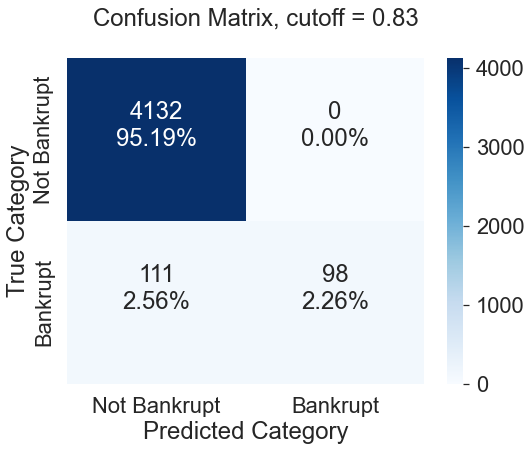

In [ ]:
cutoff=0.83

XGBC_class1_pred0_1 = pd.DataFrame(XGBC_final.predict_proba(X_validation)[:,1:2])


XGBC_class1_pred0_1[XGBC_class1_pred0_1<cutoff]=0
XGBC_class1_pred0_1[XGBC_class1_pred0_1>=cutoff]=1

print("Accuracy: ",accuracy_score(XGBC_class1_pred0_1,y_validation))
print("Precision: ",precision_score(XGBC_class1_pred0_1,y_validation))
print("Recall: ",recall_score(XGBC_class1_pred0_1,y_validation))

cm = confusion_matrix(y_validation,XGBC_class1_pred0_1)
plot_confusion(cm)
plt.title('   Confusion Matrix, cutoff = 0.83\n')


Accuracy:  0.9781156415572448
Precision:  0.5980861244019139
Recall:  0.9191176470588235


/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/seaborn/matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
/opt/homebrew/Caskroom/miniforge/base/envs/boost/lib/python3.8/site-packages/seaborn/matrix.py:312: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ax.figure.colorbar(mesh, cax, ax, **self.cbar_kws)


Text(0.5, 1.0, '   Confusion Matrix, cutoff = 0.5\n')

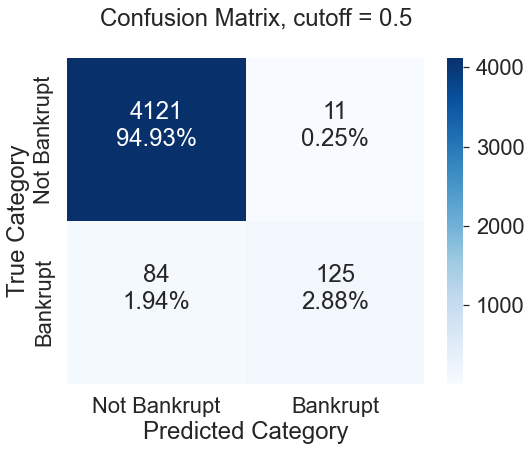

In [ ]:
cutoff=0.5

XGBC_class1_pred0_1 = pd.DataFrame(XGBC_final.predict_proba(X_validation)[:,1:2])


XGBC_class1_pred0_1[XGBC_class1_pred0_1<cutoff]=0
XGBC_class1_pred0_1[XGBC_class1_pred0_1>=cutoff]=1

print("Accuracy: ",accuracy_score(XGBC_class1_pred0_1,y_validation))
print("Precision: ",precision_score(XGBC_class1_pred0_1,y_validation))
print("Recall: ",recall_score(XGBC_class1_pred0_1,y_validation))

cm = confusion_matrix(y_validation,XGBC_class1_pred0_1)
plot_confusion(cm)
plt.title('   Confusion Matrix, cutoff = 0.5\n')
